In [1]:
import pandas as pd

In [140]:
data = pd.read_csv('Full-table.csv')
data = data.head(100)
data.shape

(100, 7)

In [141]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Player,Tm,G,Year,ID
0,0,62,Jim Chones,CLE,82,1977,choneji01
1,1,182,Sam Lacey,KCK,82,1977,laceysa01
2,2,29,Ron Boone,KCK,82,1977,boonero01
3,3,180,Mitch Kupchak,WSB,82,1977,kupchmi01
4,4,289,Dick Snyder,CLE,82,1977,snydedi01


In [142]:
data['Tm_year'] = data['Tm'] + [str(i) for i in data['Year']]

In [143]:
tm_year_dict = {i:[] for i in data['Tm_year']}

In [144]:
for index, player_id in enumerate(data['ID']):
    tm_year_dict[data['Tm_year'][index]].append(player_id)

In [145]:
tm_year_dict

{'CLE1977': ['choneji01', 'snydedi01', 'carrau01', 'smithbi02', 'breweji01'],
 'KCK1977': ['laceysa01',
  'boonero01',
  'eakinji01',
  'washiri01',
  'johnsol01',
  'wedmasc01'],
 'WSB1977': ['kupchmi01', 'hayesel01', 'unselwe01', 'cheniph01', 'wrighla01'],
 'DET1977': ['douglle01', 'carrml01', 'fordch01', 'porteke01', 'porteho01'],
 'MIL1977': ['bridgju01', 'bucknqu01', 'wintebr01'],
 'SAS1977': ['bristal01',
  'dietrco01',
  'olberma01',
  'paultbi01',
  'gervige01',
  'galemi01',
  'dampilo01'],
 'BUF1977': ['smithra01', 'digreer01'],
 'GSW1977': ['smithph01', 'willigu01', 'johnsch01', 'dudlech01', 'barryri01'],
 'LAL1977': ['kupeccj01',
  'abdulka01',
  'russeca01',
  'forddo01',
  'chanedo01',
  'allenlu01'],
 'PHO1977': ['leero01', 'westppa01', 'soberri01', 'vanardi01'],
 'HOU1977': ['lucasjo01',
  'murphca01',
  'newlimi01',
  'kunneke01',
  'tomjaru01',
  'malonmo01',
  'johnsjo01'],
 'SEA1977': ['burleto01', 'johnsde01', 'sealsbr01', 'wattssl01', 'wilkebo01'],
 'NYK1977': ['s

In [146]:
id_to_name = {data['ID'].loc[i]: data['Player'].loc[i] for i in range(len(data))}

In [147]:
id_to_name

{'choneji01': 'Jim Chones',
 'laceysa01': 'Sam Lacey',
 'boonero01': 'Ron Boone',
 'kupchmi01': 'Mitch Kupchak',
 'snydedi01': 'Dick Snyder',
 'douglle01': 'Leon Douglas',
 'bridgju01': 'Junior Bridgeman',
 'bristal01': 'Allan Bristow',
 'smithra01': 'Randy Smith',
 'smithph01': 'Phil Smith',
 'dietrco01': 'Coby Dietrick',
 'kupeccj01': 'C.J. Kupec',
 'leero01': 'Ron Lee',
 'abdulka01': 'Kareem Abdul-Jabbar',
 'lucasjo01': 'John Lucas',
 'burleto01': 'Tom Burleson',
 'sheltlo01': 'Lonnie Shelton',
 'murphca01': 'Calvin Murphy',
 'russeca01': 'Cazzie Russell',
 'newlimi01': 'Mike Newlin',
 'carrau01': 'Austin Carr',
 'carrml01': 'M.L. Carr',
 'olberma01': 'Mark Olberding',
 'paultbi01': 'Billy Paultz',
 'eakinji01': 'Jim Eakins',
 'boerwto01': 'Tom Boerwinkle',
 'ervinju01': 'Julius Erving',
 'washiri01': 'Richard Washington',
 'grossbo01': 'Bob Gross',
 'hayesel01': 'Elvin Hayes',
 'gilmoar01': 'Artis Gilmore',
 'willigu01': 'Gus Williams',
 'hillmda01': 'Darnell Hillman',
 'gervige01'

In [148]:
player_dict = {i:set() for i in data['ID']}

In [149]:
for team in tm_year_dict:
    for player in tm_year_dict[team]:
        gen = (teammate for teammate in tm_year_dict[team] if teammate != player)
        for i in gen:
            player_dict[player].add(i)

for player in player_dict:
    player_dict[player] = list(player_dict[player])

In [150]:
player_dict

{'choneji01': ['carrau01', 'snydedi01', 'breweji01', 'smithbi02'],
 'laceysa01': ['johnsol01',
  'wedmasc01',
  'eakinji01',
  'washiri01',
  'boonero01'],
 'boonero01': ['johnsol01',
  'wedmasc01',
  'eakinji01',
  'washiri01',
  'laceysa01'],
 'kupchmi01': ['wrighla01', 'hayesel01', 'cheniph01', 'unselwe01'],
 'snydedi01': ['choneji01', 'breweji01', 'smithbi02', 'carrau01'],
 'douglle01': ['fordch01', 'porteho01', 'porteke01', 'carrml01'],
 'bridgju01': ['bucknqu01', 'wintebr01'],
 'bristal01': ['gervige01',
  'dietrco01',
  'dampilo01',
  'paultbi01',
  'olberma01',
  'galemi01'],
 'smithra01': ['digreer01'],
 'smithph01': ['johnsch01', 'barryri01', 'dudlech01', 'willigu01'],
 'dietrco01': ['gervige01',
  'dampilo01',
  'paultbi01',
  'olberma01',
  'galemi01',
  'bristal01'],
 'kupeccj01': ['forddo01', 'chanedo01', 'allenlu01', 'abdulka01', 'russeca01'],
 'leero01': ['westppa01', 'vanardi01', 'soberri01'],
 'abdulka01': ['forddo01', 'kupeccj01', 'chanedo01', 'allenlu01', 'russeca01

In [151]:
#Pickle dump of dictionary
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle

with open('data.p', 'wb') as fp:
    pickle.dump(player_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [152]:
'''
Working on the graph
'''
import networkx as nx

In [153]:
G = nx.Graph()

In [154]:
G = nx.convert.from_dict_of_lists(player_dict)

In [155]:
G

In [156]:
import matplotlib.pyplot as plt

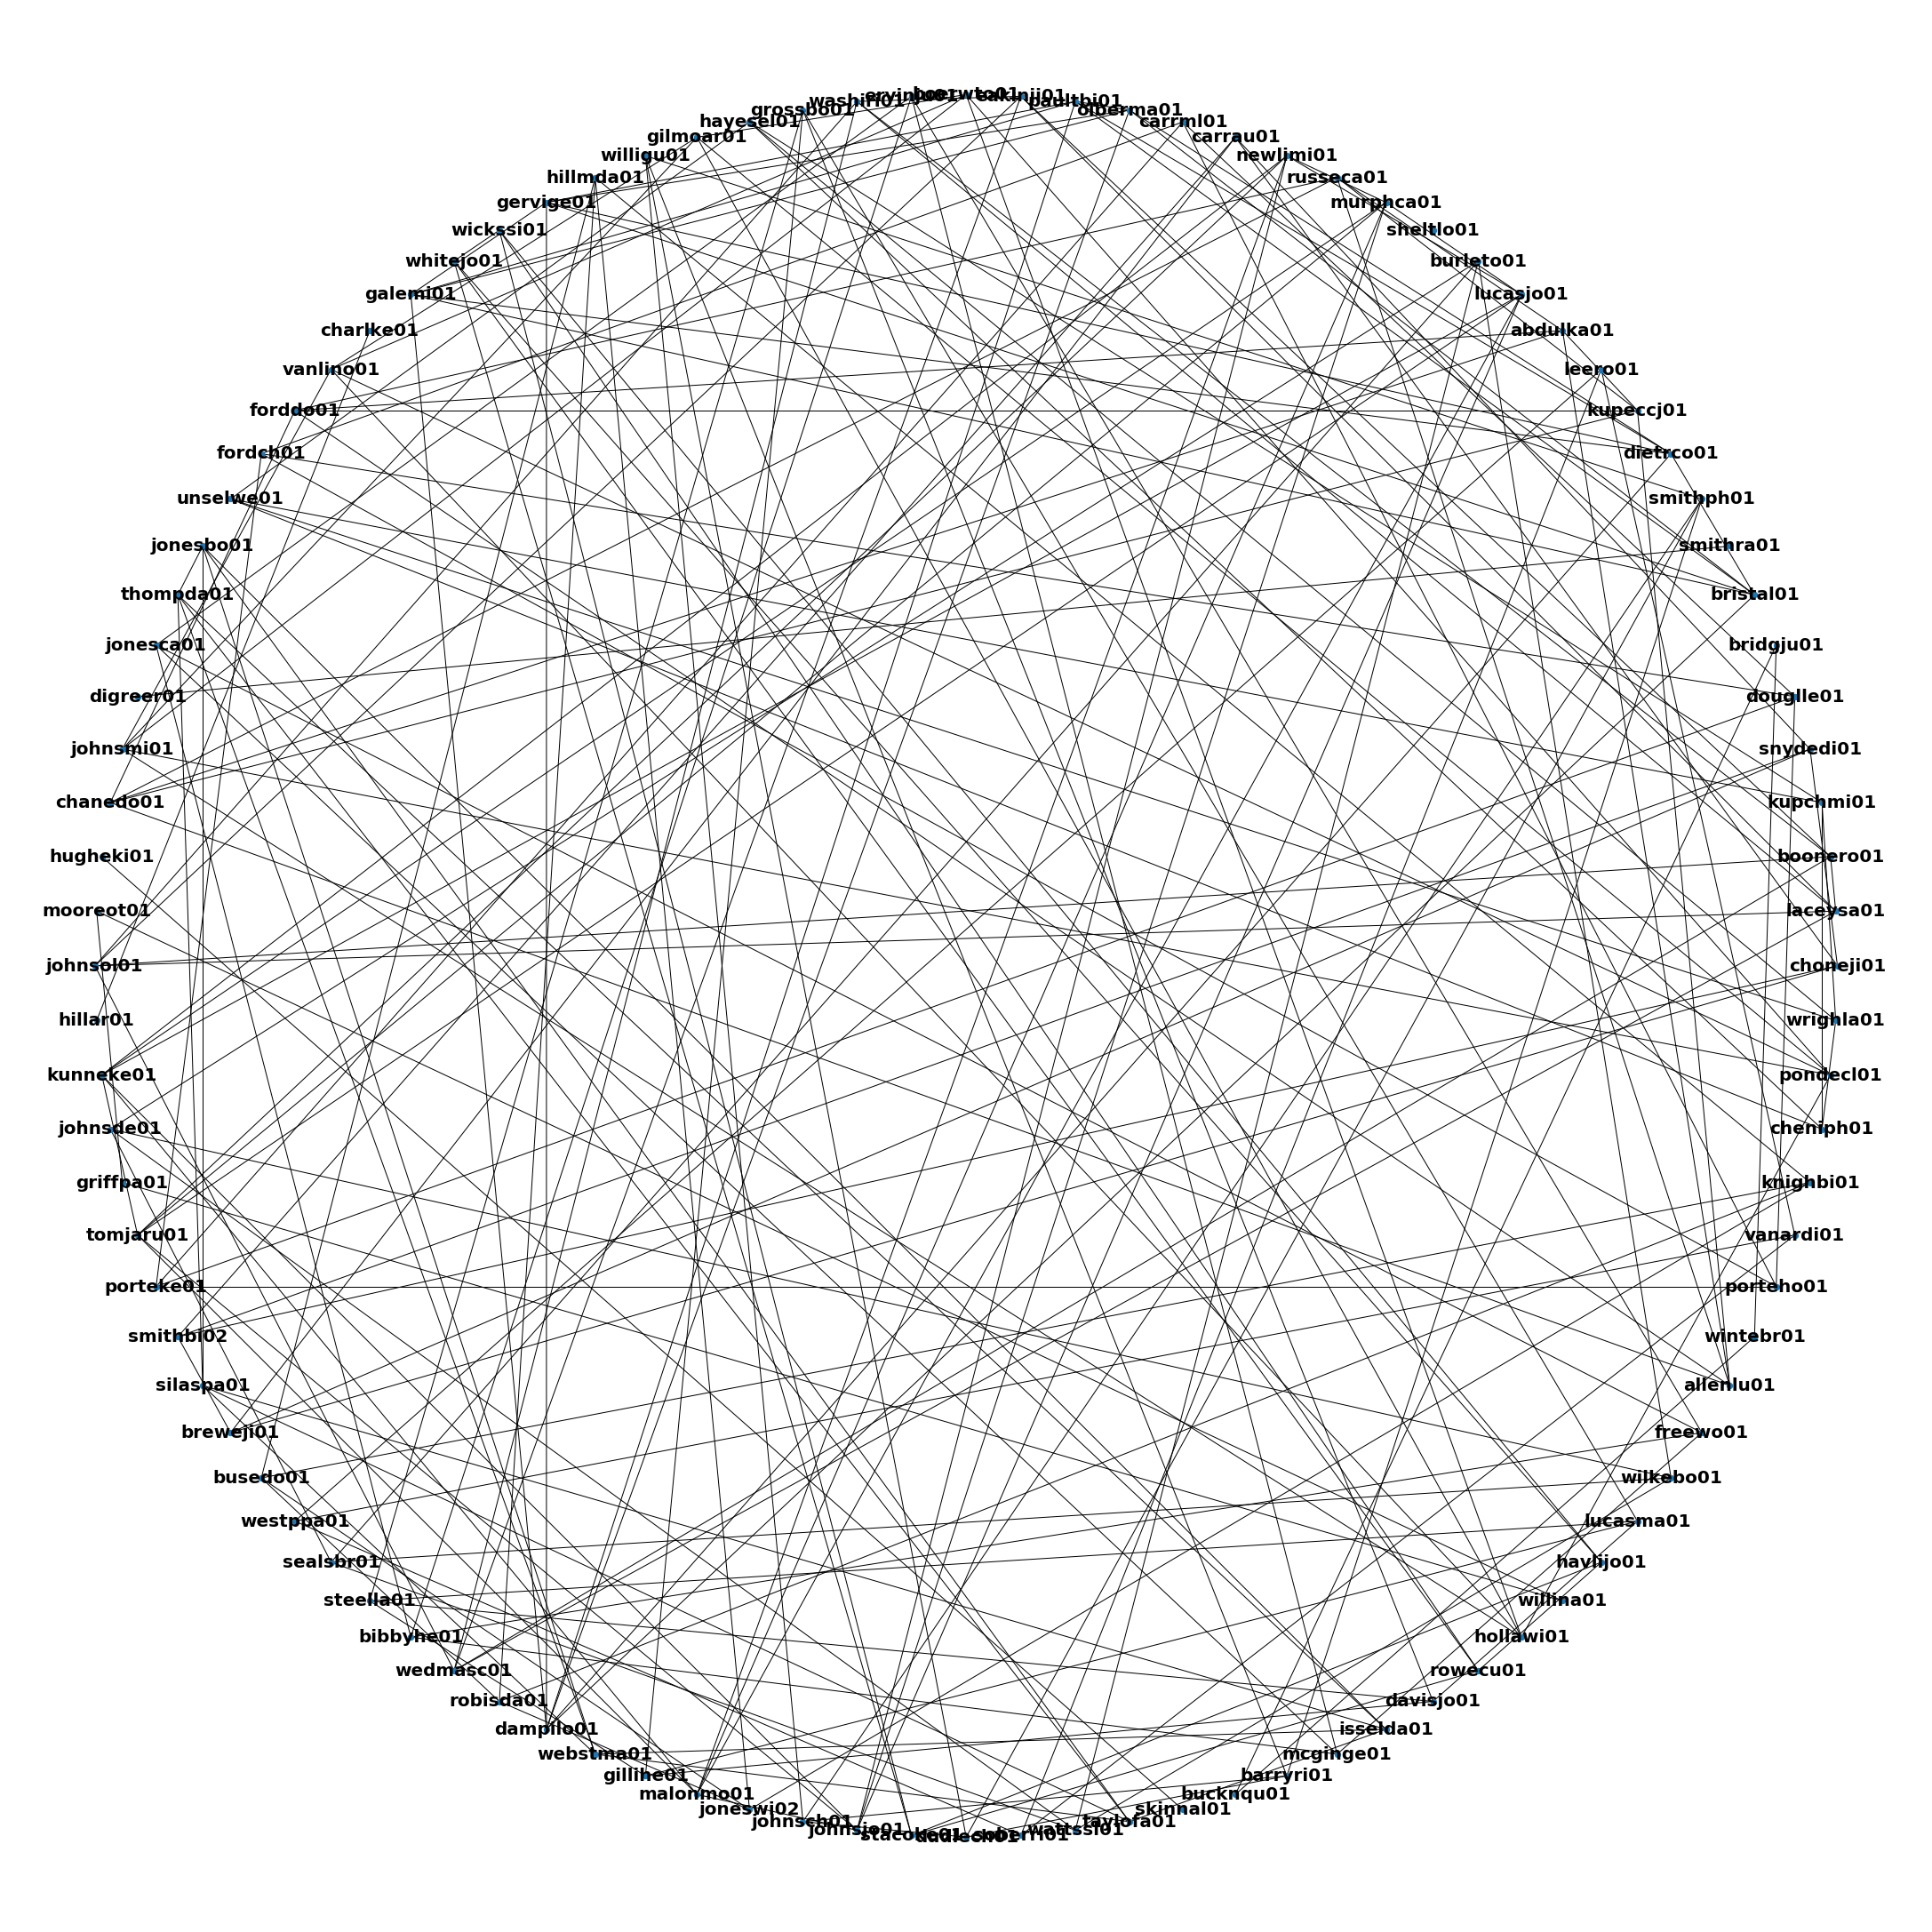

In [161]:
plt.figure(figsize=(30,30))
nx.draw_shell(G, with_labels=True, font_weight='bold', font_size=20, node_size=40)